# VALIAÇÃO CRUZADA
A validação cruzada é um método de avaliação de modelos de aprendizado de máquina:
* Ajuda a comparar e selecionar um modelo apropriado para o problema específico de modelagem preditiva
* Desenvolvido para obter uma estimativa precisa da acurácia de previsão um conjunto de dados
* Fornece uma visão ampla do desempenho de modelos de aprendizagem de máquina
* Ajuda a reduzir o risco de overfiting e melhorar o desempenho do modelo
* Particiona os dados de treinamento em grupos diferentes com tamanhos definidos e usando-os para treinar e testar o modelo de aprendizagem de máquina em múltiplas configurações


O conjunto original de dados de treinamento é particionado em um número determinado de grupos com conjuntos de teste e treinamento. Os grupos são organizados de modo que todos os dados de treinamento sejam usados para testar o modelo. A Validação cruzada reduz o overfiting por fornecer subconjuntos diferentes de dados para treinar e testar o modelo. Isso garante que o modelo tem menos chances de se ajustar a ruídos e outras características únicas de dados específicos.

A validação cruzada é realizada em múltiplas iterações, onde os dados de treinamento são particionados em novos subconjuntos de treinamento e teste (para cada iteração), e o classificador é treinado treinado e avaliado usando-se esses subconjuntos.<br>

Existem várias técnicas diferentes para validação cruzada, ainda assim, todas têm um algoritmo semelhante:<br>
1 - Dividir o conjunto de dados de treinamento dois subconjuntos: um de com dados treinamento da iteração e outro com dados de teste da iteração.<br>
2 - Treinar o modelo no conjunto de treinamento.<br>
3 - Validar o modelo no conjunto de teste.<br>
4 - Repetir etapas 1 a 3 algumas vezes. Este número depende do método de validação cruzada que está sendo usado.<br>


## Método Kfold
Validação cruzada K-Fold é uma implementação de validação cruzada que usa K partições dos dados de treinamento original. A validação é realizada em um número fixo K de iterações. A cada iteração o conjunto de dados de treinamento é particionado de modo que ao longo das K iterações, todos os dados do conjunto de treinamento original sejam utilizados para testar o classificador. O desempenho médio dos modelos treinados nas K iterações serve como o resultado usado para avaliação.<br>

A biblioteca sklearn fornece a função Kfold que particiona o conjunto de dados de treinamento original nos subconjuntos de treinamento e teste para cada iteração.<br>

O TDE é dividido em três partes:



### Parte 1 - Classificador GaussianNB
* Treinamento
* Cálculo de métricas
* Validação cruzada

### Parte 2 - Classificação GaussianMV
* Treinamento
* Cálculo de métricas
* Validação cruzada

### Parte 3 - Conclusão

### Importar bibliotecas

In [3]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install scikit-plot
!pip install scipy==1.11.4

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [4]:
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

### Conectar com GoogleDrive

### Leitura de dados de de treinamento
O dados no arquivo YTreinamento2.csv não foram utilizado na FORMATIVA do classificador GaussianMV porque o treinamento desse classificador é não supervisionado.<br>
Os dados são necessários para o classificador GaussianNB porque o seu treinamento é supervisionado.<br>
Os dados também necessários para a validação cruzada.

In [6]:
Xtre = np.loadtxt('/content/DadosTreinamento2.csv', delimiter=',')
Ytre = np.loadtxt('/content/YTreinamento2.csv', delimiter=',')

### Leitura dos dados de validação
Os dados do arquivo DaddosValidação2 são necessários para treinar o classificador GaussianMV.

In [7]:
# Leitura do arquivo com dados de validação
XYval = np.loadtxt('/content/DadosValidacao2.csv', delimiter=',')
Xval = XYval[:,[0,1,2,3,4,5,6,7,8,9,10]]
Yval = XYval[:,11]

### Leitura dos dados de teste

In [8]:
XYtest = np.loadtxt('/content/DadosTeste2.csv', delimiter=',')
X_test = XYtest[:,[0,1,2,3,4,5,6,7,8,9,10]]
Y_test = XYtest[:,11]

## Parte 1 - Classificador GaussianNB
* Utilizar classificador GaussianNB para detecção de anomalias utilizando os dados de servidores em uma rede.
* Calcular as métricas de classificação e comparar com o relatório produzido pela biblioteca sklearn.
* Plotar a matriz de confusão
* Realizar validação cruzada método KFold

### Treinamento e previsão
* Criar classificador<br>
* Treinar com dados de treinamento utilizando a matriz com os dados de treinamento (Xtre) e o vetor com os rótulo de treinamento (Ytre)<br>
* Faz previsão utilizando os dados de teste (X_test)

In [10]:
# Criar classificador
clf = GaussianNB()
clf.fit(Xtre, Ytre)

# Fazer previsão utilizando os dados de teste
Y_prev = clf.predict(X_test)
Y_prev

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Métricas de classificação
#### Nessa seção vamos calcular manualmete as métricas da biblioteca sklearn
Considerando:
* vp = verdadeiro positivo
* vn = verdadeiro negativo
* fp = falso positivo
* fn = falso negativo

Considerando a nomenclatura utilizada na biblioteca sklearn:
* accuracy: (vp+vn)/(vp+vn+fp+fn)
* support_0: quantidade real de negativos (fp + vn)
* support_1: quantidade real de positivos (vp + fn)
* precision_0: vn/(vn+fn)
* precision_1: vp/(vp+fp)
* precision_weighted_avg: (precision_0 \* support_0 + precision_1 \* support_1) / (support_0 + support_1)
* recall_0: vn/(vn+fp)
* recall_1: vp/(vp+fn)
* recall_weighted_avg: (recall_0 \* support_0 + recall_1 \* support_1) / (support_0 + support_1)
* F1_0: (2 \* precision_0 \* recall_0) / (precision_0 + recall_0)
* F1_1: (2 \* precision_1 \* recall_1) / (precision_1 + recall_1)
* F1_weighted_avg: (F1_0 \* support_0 + F1_1 \* support_1) / (support_0 + support_1)

#### Calcular vp vn fp fn
Usar os vetores Y_test e Y_prev para calcular a quantidade de verdadeiros positivos (vp)<br>
* Os valores verdadeiros positivos correspondem aos casos onde os rótulos de teste (em Y_test) têm valor igual a 1 e os valores previstos (em Y_prev) têm valor 1.<br>
* Dica: O comando ((Y_test == 1)&(Y_prev == 1)) produz um vetor que terá valores True nas posições correspondentes aos verdadeiros positivos. Para encontrar a quantidade de verdadeiros positivos utilize a função sum.<br><br>

Usar os vetores Y_test e Y_prev para calcular a quantidade de verdadeiros negativos (vn)<br>
* Os valores verdadeiros positivos correspondem aos casos onde os rótulos de teste (em Y_test) têm valor igual a 1 e os valores previstos (em Y_prev) têm valor 1.<br>
* Dica: O comando ((Y_test == 0)&(Y_prev == 0)) produz um vetor que terá valores True nas posições correspondentes aos verdadeiros positivos. Para encontrar a quantidade de verdadeiros positivos utilize a função sum.<br><br>

Usar os vetores Y_test e Y_prev para calcular a quantidade de falsos positivos (fp)<br><br>
Usar os vetores Y_test e Y_prev para calcular a quantidade de falsos negativos (fn)<br><br>

In [11]:
# Calcular a quantidade de verdadeiros positivos (vp)
vp = sum((Y_test == 1) & (Y_prev == 1))

# Calcular a quantidade de verdadeiros negativos (vn)
vn = sum((Y_test == 0) & (Y_prev == 0))

# Calcular a quantidade de falsos positivos (fp)
fp = sum((Y_test == 0) & (Y_prev == 1))

# Calcular a quantidade de falsos negativos (fn)
fn = sum((Y_test == 1) & (Y_prev == 0))

# Imprimir valores calculados
print(f'vp = {vp}, fp = {fp}, vn = {vn}, fn = {fn}')


vp = 17, fp = 0, vn = 354, fn = 29


#### Calcular métricas

In [12]:
# Calcular Accuracy
acc = (vp + vn) / (vp + vn + fp + fn)

# Se o código estiver correto, você deve encontrar accuracy = 0.93
print('accuracy = {0:.2f}'.format(acc))

# Calcular Precision, Recall e F1 para verdadeiros negativos (classe 0)
prec_0 = vn / (vn + fn) if (vn + fn) != 0 else 0
rec_0 = vn / (vn + fp) if (vn + fp) != 0 else 0
F1_0 = (2 * prec_0 * rec_0) / (prec_0 + rec_0) if (prec_0 + rec_0) != 0 else 0

# Se o código estiver correto, você deve encontrar precision_0 = 0.92, recall_0 = 1.00, F1_0 = 0.96
print('precision_0 = {0:.2f} recall_0 = {1:.2f} F1_0 = {2:.2f}'.format(prec_0, rec_0, F1_0))

# Calcular Precision, Recall e F1 para verdadeiros positivos (classe 1)
prec_1 = vp / (vp + fp) if (vp + fp) != 0 else 0
rec_1 = vp / (vp + fn) if (vp + fn) != 0 else 0
F1_1 = (2 * prec_1 * rec_1) / (prec_1 + rec_1) if (prec_1 + rec_1) != 0 else 0

# Se o código estiver correto, você deve encontrar precision_1 = 1.00, recall_1 = 0.37, F1_1 = 0.54
print('precision_1 = {0:.2f} recall_1 = {1:.2f} F1_1 = {2:.2f}'.format(prec_1, rec_1, F1_1))

# Calcular métricas ponderadas (weighted metrics)
support_0 = fp + vn  # Suporte da classe 0
support_1 = vp + fn  # Suporte da classe 1

prec_mp = (prec_0 * support_0 + prec_1 * support_1) / (support_0 + support_1)
rec_mp = (rec_0 * support_0 + rec_1 * support_1) / (support_0 + support_1)
F1_mp = (F1_0 * support_0 + F1_1 * support_1) / (support_0 + support_1)

# Se o código estiver correto, você deve encontrar precision_mp, recall_mp, F1_mp ponderados corretamente
print('precision_mp = {0:.2f} recall_mp = {1:.2f} F1_mp = {2:.2f}'.format(prec_mp, rec_mp, F1_mp))


accuracy = 0.93
precision_0 = 0.92 recall_0 = 1.00 F1_0 = 0.96
precision_1 = 1.00 recall_1 = 0.37 F1_1 = 0.54
precision_mp = 0.93 recall_mp = 0.93 F1_mp = 0.91


#### Conferir as métricas calculadas
Conferir as métricas comparando com as métricas calculadas pela biblioteca sklearn.<br>
Dica: utilizar metrics.classification_report.

In [13]:
from sklearn import metrics

# Exibir o relatório de classificação usando sklearn
classification_report = metrics.classification_report(Y_test, Y_prev)
print("Relatório de classificação do sklearn:\n", classification_report)


Relatório de classificação do sklearn:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       354
         1.0       1.00      0.37      0.54        46

    accuracy                           0.93       400
   macro avg       0.96      0.68      0.75       400
weighted avg       0.93      0.93      0.91       400



#### Plotar matriz de confusão

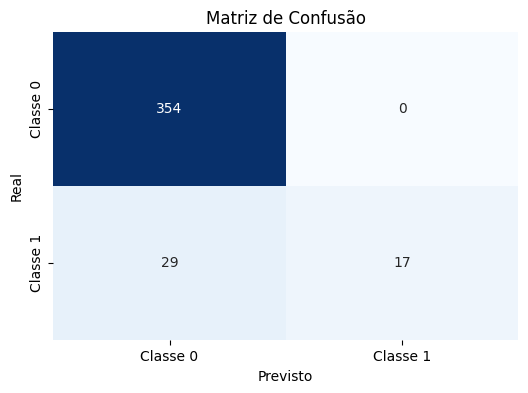

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Gerar a matriz de confusão
cm = confusion_matrix(Y_test, Y_prev)

# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


### Validação Cruzada
#### Visualização do método Kfold
A biblioteca sklearn fornece a função Kfold que particiona o conjunto de dados de treinamento original nos subconjuntos de treinamento e teste para cada iteração.<br>

A função $\text{plot_cv_indices}$ ilustra a partição dos índices das amostras que são utilizados em cada iteração para selecionar os subconjuntos de treinamento e teste em cada iteração a partir dos dados originais de treinamento $\text{Xtre}$e $\text{Ytre}$.

In [15]:
def plot_cv_indices(cv, X, y, K):
    """Plotagem dos índices das amostras de uma validação cruzada KFold"""

    fig, ax = plt.subplots()
    # Gerar visualizações de treinamento e teste para cada partição de validação cruzada
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Setar cores para os índices dos conjuntos de teste e treinamento
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1  # Vermelho
        indices[tr] = 0  # Azul

        # Visualize the results
        ax.scatter(
            # Valores no eixo x
            range(len(indices)),
            # Valores no eixo y (número da iteração + 0.5)
            [ii + 0.5] * len(indices),
            # Cor de cada ponto
            c=indices,
            # Marca de cada ponto
            marker="_",
            # Largura da linha
            lw=10,
            # Mapa de cores
            cmap=plt.cm.coolwarm,
            # Controle de cores
            vmin=-0.2,
            vmax=1.2,
        )

    # Formatação
    yticklabels = list(range(K))
    ax.set(
        yticks=np.arange(K) + 0.5,
        yticklabels=yticklabels,
        xlabel="Índice da amostra",
        ylabel="Iteração",
        ylim=[K + 0.2, -0.2],
        xlim=[0, X.shape[0]]
    )
    ax.set_title("Validação cruzada {}".format(type(cv).__name__), fontsize=15)

    ax.legend(
        [Patch(color=plt.cm.coolwarm(0.8)), Patch(color=plt.cm.coolwarm(0.02))],
        ["Teste", "Treinamento"],
        loc=(1.02, 0.8),
    )
    return ax

#### Plotar partição KFold

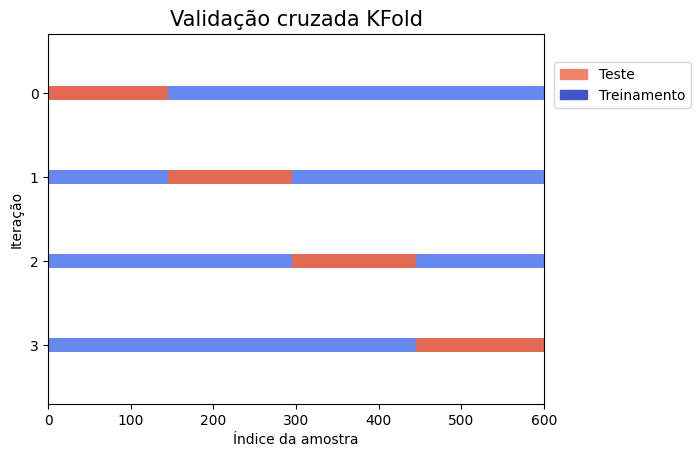

In [16]:
# Define a quantidade de iterações
K = 4
# Cria o objeto Kfold
cv = KFold(K)
# plot_cv_indices(cv, X_trein, Y_trein, K);
plot_cv_indices(cv, Xtre, Ytre, K);

#### Realizar validação cruzada KFold
O código a seguir realiza a validação cruzada $\text{Kfold}$. Utiliza o objeto $\text{cv}$ para criar as partições.

In [17]:
# Cria vetor de scores
accuracy_scores = []
f1_scores = []
for tr, tt in cv.split(Xtre, Ytre):
    X_tr = np.array(Xtre)[tr.astype(int)]
    Y_tr = np.array(Ytre)[tr.astype(int)]
    X_tt = np.array(Xtre)[tt.astype(int)]
    Y_tt = np.array(Ytre)[tt.astype(int)]
    clf.fit(X_tr, Y_tr)
    Y_prev = clf.predict(X_tt)
    acc = metrics.accuracy_score(Y_tt, Y_prev)
    # print(acc)
    accuracy_scores.append(acc)
    # print(accuracy_scores)
    f1 = metrics.f1_score(Y_tt, Y_prev, average='weighted')
    f1_scores.append(f1)

#### Mostrar resultado da validação cruzada

In [18]:
print(f"Accuracy scores: {accuracy_scores}")
print("Média = %0.2f\nDesvio padrão = %0.2f" % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print(f"\nF1_wa_scores: {f1_scores}")
print("Média = %0.2f\nDesvio padrão = %0.2f" % (np.mean(f1_scores), np.std(f1_scores)))

Accuracy scores: [0.9266666666666666, 0.92, 0.8933333333333333, 0.9466666666666667]
Média = 0.92
Desvio padrão = 0.02

F1_wa_scores: [0.9146666666666666, 0.9046218487394958, 0.8698507462686568, 0.9377370830608239]
Média = 0.91
Desvio padrão = 0.02


####  Função cross_val_score
A função cross_val_score realiza a validação cruzada ecalcula os scores automaticamente.<br>
Ela precisa que o classificador tenha sido treinado pela biblioteca sktearn.<br>
Usada aqui para conferir o algorimo anterior.

In [19]:
accuracy_scores = cross_val_score(clf, Xtre, Ytre, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(clf, Xtre, Ytre, cv=cv, scoring='f1_weighted')
print(f"Accuracy scores: {accuracy_scores}")
print("Média = %0.2f\nDesvio padrão = %0.2f" % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print(f"\nF1_scores: {f1_scores}")
print("Média = %0.2f\nDesvio padrão = %0.2f" % (np.mean(f1_scores), np.std(f1_scores)))

Accuracy scores: [0.92666667 0.92       0.89333333 0.94666667]
Média = 0.92
Desvio padrão = 0.02

F1_scores: [0.91466667 0.90462185 0.86985075 0.93773708]
Média = 0.91
Desvio padrão = 0.02


####  Comparação das métricas de teste e de avaliação cruzada
Imprimir as métricas accuracy e F1 resultantes da avaliação no conjunto de teste.<br>
Imprimir as médias das métricas accuracy e F1 resultantes da avaliação cruzada.

In [20]:
print("Comparação de métricas GaussianNB")
print("Avaliação com conjunto de teste: Accuracy = %0.4f  F1 = %0.4f" % (acc, F1_mp))
print("Avaliação com validação cruzada: Accuracy = %0.4f  F1 = %0.4f" % (np.mean(f1_scores), np.mean(f1_scores)))

Comparação de métricas GaussianNB
Avaliação com conjunto de teste: Accuracy = 0.9467  F1 = 0.9122
Avaliação com validação cruzada: Accuracy = 0.9067  F1 = 0.9067


## Parte 2 - Classificador GaussianMV
* Código do classificador GaussianNB.
* Calcular as métricas de classificação e comparar com o relatório produzido pela biblioteca sklearn.
* Plotar a matriz de confusão
* Realizar validação cruzada método KFold

### Classificador Gaussian

In [21]:
from scipy.stats import multivariate_normal
class GMV:
    def selecionarLimiar(self, Pval):
        # Iniciar os valores das variáveis locais
        melhorLimiar = 0
        melhorF1 = 0
        F1 = 0
        passo = (np.max(Pval) - np.min(Pval)) / 1000
        for limiar in np.arange(np.min(Pval), np.max(Pval), passo):
            Prev = (Pval < limiar).astype(np.float64)
            vp = np.count_nonzero(np.logical_and((Prev == 1),(self.Yval == 1)))
            fp = np.count_nonzero(np.logical_and((Prev == 1),(self.Yval == 0)))
            fn = np.count_nonzero(np.logical_and((Prev == 0),(self.Yval == 1)))
            if vp !=0:
                prec = vp/(vp+fp)  # cálculo de prec
                rec = vp/(vp+fn)   # cálculo de rec
                F1 = (2*prec*rec) / (prec+rec)  # cálculo de F1
            if F1 > melhorF1:
                melhorF1 = F1
                melhorLimiar = limiar
        return melhorLimiar

    def __init__(self, Xval, Yval):
        self.Xval = Xval
        self.Yval = Yval
        self.nmv = multivariate_normal(np.array([0, 0]), np.array([[1, 0],[0, 1]]))
        # self.F1 = float(0.0)
        self.Limiar = float(0.0)

    def fit(self, Xtre):
        self.nmv = multivariate_normal(Xtre.mean(axis=0), np.cov(Xtre.T))
        Pval = self.nmv.pdf(Xval)
        self.Limiar = self.selecionarLimiar(Pval)

    def predict(self, X_tt):
        Pval = self.nmv.pdf(X_tt)
        Yprev = (Pval < self.Limiar).astype(np.float64)
        return Yprev

### Classificação (criar classificador, ajustar, prever)

In [31]:
  # Criar classificador
  clf = GMV(Xval, Yval)
  # Ajustar classificador
  clf.fit(Xtre)
  # Fazer previsões
  Y_prev = clf.predict(X_test)

### Métricas de classificação

#### acc, prec, rec, F1

In [32]:
# Contagem de vp vn fp fn realizada com numpy como exemplo
# Poderia ser realizada da mesma forma que no classificador Gaussiano
# Por exemplo, para verdadeiros positivos: vp = sum((Y_test == 1)&(Y_prev == 1))

# Verdadeiros positivos
vp = np.count_nonzero(np.logical_and((Y_prev == 1),(Y_test == 1)))
# Verdadeiros negativos
vn = np.count_nonzero(np.logical_and((Y_prev == 0),(Y_test == 0)))
# Falsos positivos
fp = np.count_nonzero(np.logical_and((Y_prev == 1),(Y_test == 0)))
# Falsos negativos
fn = np.count_nonzero(np.logical_and((Y_prev == 0),(Y_test == 1)))

# Exatidão (accuracy)
acc = (vp+vn)/(vp+vn+fp+fn)
print(acc)
# Precisão (precision)
prec = vp/(vp+fp)
print(prec)
# Revocação (recall)
rec = vp/(vp+fn)
print(rec)
# F1
F1 = (2*prec*rec) / (prec+rec)
print(F1)

0.9775
0.8363636363636363
1.0
0.9108910891089108


#### Calcular média ponderada das métricas de avaliação

In [33]:
# Accuracy
acc = (vp+vn)/(vp+vn+fp+fn)

# prec rec F1 para anomalias
prec_1 = vp/(vp+fp)
rec_1 = vp/(vp+fn)
F1_1 = (2*prec_1*rec_1) / (prec_1+rec_1)

# prec rec F1 para não anomalias
prec_0 = vn/(vn+fn)
rec_0 = vn/(vn+fp)
F1_0 = (2*prec_0*rec_0) / (prec_0+rec_0)

# prec rec F1 média ponderada
support_0 = fp + vn
support_1 = vp + fn
prec_mp = (prec_0 * support_0 + prec_1 * support_1) / (support_0 + support_1)
rec_mp = (rec_0 * support_0 + rec_1 * support_1) / (support_0 + support_1)
F1_mp = (F1_0 * support_0 + F1_1 * support_1) / (support_0 + support_1)

print(F1_0)
print(F1_1)
print(F1_mp)

0.9871244635193133
0.9108910891089108
0.978357625462117


#### Relatório de métricas de classificação e matriz de confusão





Relatório de classificação do sklearn:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       354
         1.0       0.84      1.00      0.91        46

    accuracy                           0.98       400
   macro avg       0.92      0.99      0.95       400
weighted avg       0.98      0.98      0.98       400



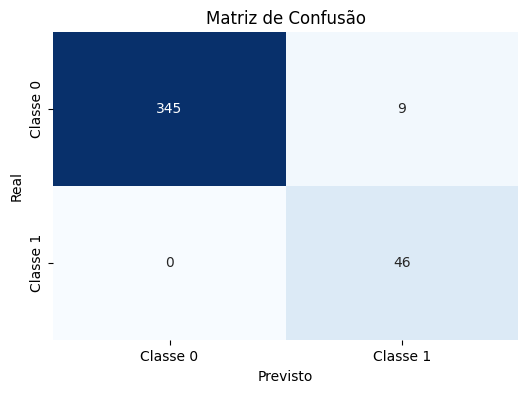

In [34]:
# Exibir o relatório de classificação usando sklearn
classification_report = metrics.classification_report(Y_test, Y_prev)
print("Relatório de classificação do sklearn:\n", classification_report)


# Gerar a matriz de confusão
cm = confusion_matrix(Y_test, Y_prev)

# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


#### Conferir resultados
Até aqui foram realizados os mesmos cálculos realizado na FORMATIVA do classificador gaussiana multivada.<br>
Você deve conferir os resultados obtidos aqui (relatório de métricas e matriz de confusão) com os resultados obtidos na FORMATIVA.<br>

### Validação Cruzada

#### Realizar validação cruzada KFold

#### Mostrar resultado da validação cruzada

In [40]:

# Cria vetor de scores
accuracy_scores = []
f1_scores = []
for tr, tt in cv.split(Xtre, Ytre):
    X_tr = np.array(Xtre)[tr.astype(int)]
    Y_tr = np.array(Ytre)[tr.astype(int)]
    X_tt = np.array(Xtre)[tt.astype(int)]
    Y_tt = np.array(Ytre)[tt.astype(int)]

    clf = GMV(Xval, Yval)  # Cria um novo classificador para cada iteração
    clf.fit(X_tr)
    Y_prev = clf.predict(X_tt)

    acc = metrics.accuracy_score(Y_tt, Y_prev)
    accuracy_scores.append(acc)
    f1 = metrics.f1_score(Y_tt, Y_prev, average='weighted')
    f1_scores.append(f1)

print(f"Accuracy scores: {accuracy_scores}")
print("Média = %0.2f\nDesvio padrão = %0.2f" % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print(f"\nF1_wa_scores: {f1_scores}")
print("Média = %0.2f\nDesvio padrão = %0.2f" % (np.mean(f1_scores), np.std(f1_scores)))


Accuracy scores: [0.9666666666666667, 0.9533333333333334, 0.98, 0.9733333333333334]
Média = 0.97
Desvio padrão = 0.01

F1_wa_scores: [0.967827903949577, 0.9561629243405377, 0.9801642409952029, 0.9747014595311808]
Média = 0.97
Desvio padrão = 0.01


####  Comparação das métricas de teste e de avaliação cruzada
Imprimir as métricas accuracy e F1 resultantes da avaliação no conjunto de teste.<br>
Imprimir as médias das métricas accuracy e F1 resultantes da avaliação cruzada.

In [41]:
print("Comparação de métricas GaussianMV")
print("Avaliação com conjunto de teste: Accuracy = %0.4f  F1 = %0.4f" % (acc, F1_mp))
print("Avaliação com validação cruzada: Accuracy = %0.4f  F1 = %0.4f" % (np.mean(f1_scores), np.mean(f1_scores)))

Comparação de métricas GaussianMV
Avaliação com conjunto de teste: Accuracy = 0.9733  F1 = 0.9784
Avaliação com validação cruzada: Accuracy = 0.9697  F1 = 0.9697


## Parte 3 - Conclusão

### Copiar aqui métricas de teste e de validação cruzada dos dois classificadores
#### GaussianNB

Accuracy scores: [0.92666667 0.92       0.89333333 0.94666667]
Média = 0.92
Desvio padrão = 0.02

F1_scores: [0.91466667 0.90462185 0.86985075 0.93773708]
Média = 0.91
Desvio padrão = 0.02

Comparação de métricas GaussianNB
Avaliação com conjunto de teste: Accuracy = 0.9467  F1 = 0.9122
Avaliação com validação cruzada: Accuracy = 0.9067  F1 = 0.9067

#### GaussianMV

Accuracy scores: [0.9666666666666667, 0.9533333333333334, 0.98, 0.9733333333333334]
Média = 0.97
Desvio padrão = 0.01

F1_wa_scores: [0.967827903949577, 0.9561629243405377, 0.9801642409952029, 0.9747014595311808]
Média = 0.97
Desvio padrão = 0.01

Comparação de métricas GaussianMV
Avaliação com conjunto de teste: Accuracy = 0.9733  F1 = 0.9784
Avaliação com validação cruzada: Accuracy = 0.9697  F1 = 0.9697

### Escrever aqui comentários sobre as avaliações
A resposta é o seu comentário

Resposta: A comparação entre os classificadores GaussianNB e GaussianMV mostra que o GaussianMV supera significativamente o GaussianNB em desempenho. O GaussianNB teve uma média de acurácia de 0.92 e um F1 score médio de 0.91, com variações moderadas. Em contraste, o GaussianMV alcançou uma média de acurácia de 0.97 e um F1 score de 0.97, indicando não apenas um desempenho superior, mas também maior consistência nas avaliações. Nos testes, o GaussianNB obteve acurácia de 0.9467 e F1 de 0.9122, enquanto o GaussianMV apresentou 0.9733 de acurácia e F1 de 0.9784, confirmando sua robustez e eficácia.


